#  **Dataset del sistema de alquiler de bicicletas de Citi Bike en la ciudad de New Jersey durante el año 2019**

## **1. ABSTRACT:**

**Citi Bike** es el programa de alquiler de bicicletas compartidas más grande de Estados Unidos. El sistema es pago y está disponible para su uso 24/24. La data del uso del sistema es pública y se encuentra disponible en su sitio web. 


El dataset seleccionado está conformado por un archivo CSV, de **15 columnas y 404.750 registros**, que contienen información del servicio de alquiler de bicicletas durante el año 2019 en la ciudad de New Jersey.

El análisis tiene como **objetivo** predecir la cantidad de rentas de bicicletas en la estación de mayor uso (Grow St PATH) en el mes de Septiembre.

La **audiencia** de este análisis son los directivos del servicio Citi Bike.

## **2. PREGUNTAS DE INTERÉS**##
###**Pregunta principal:**###
¿Cuál será la cantidad de usuarios que alquilarán bicicletas del sistema Citi Bike en la estación Grow St PATH durante el mes de Septiembre?

###**Preguntas secundarias:**###
*  ¿Cuál es el top de estaciones más usadas?
*  ¿Cuáles son los meses con mayor uso del sistema?
*  ¿Cuáles son los horarios de mayor uso del sistema?
*  ¿Cuál es la distribución por género y tipo de usuario del sistema?
*  ¿Cuál es la edad promedio de los usuarios del sistema?








## **3. ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

import time
from datetime import datetime as dt

import warnings

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

from sklearn import metrics 
from sklearn.metrics import r2_score

from rdr_scorer import RdR_scorer

import geopy.distance

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
url ='https://raw.githubusercontent.com/Andresmup/Proyecto_Data_Science_Bicicletas/master/Data_Wrangling/Dataset_2019.csv'
df_csv = pd.read_csv(url)
df_csv


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404745,283,2019-12-31 23:12:18.5480,2019-12-31 23:17:01.8740,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29245,Customer,1990,1
404746,267,2019-12-31 23:19:03.5840,2019-12-31 23:23:30.6640,3186,Grove St PATH,40.719586,-74.043117,3205,JC Medical Center,40.716540,-74.049638,26153,Subscriber,1989,1
404747,379,2019-12-31 23:19:06.5830,2019-12-31 23:25:25.7970,3209,Brunswick St,40.724176,-74.050656,3185,City Hall,40.717732,-74.043845,26276,Subscriber,1984,1
404748,188,2019-12-31 23:24:00.2630,2019-12-31 23:27:09.0400,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,29461,Subscriber,1987,1


##**Resumen de datos del Dataset**

In [3]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404750 entries, 0 to 404749
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             404750 non-null  int64  
 1   starttime                404750 non-null  object 
 2   stoptime                 404750 non-null  object 
 3   start station id         404750 non-null  int64  
 4   start station name       404750 non-null  object 
 5   start station latitude   404750 non-null  float64
 6   start station longitude  404750 non-null  float64
 7   end station id           404750 non-null  int64  
 8   end station name         404750 non-null  object 
 9   end station latitude     404750 non-null  float64
 10  end station longitude    404750 non-null  float64
 11  bikeid                   404750 non-null  int64  
 12  usertype                 404750 non-null  object 
 13  birth year               404750 non-null  int64  
 14  gend

##**Top de estaciones de salida más utilizadas**

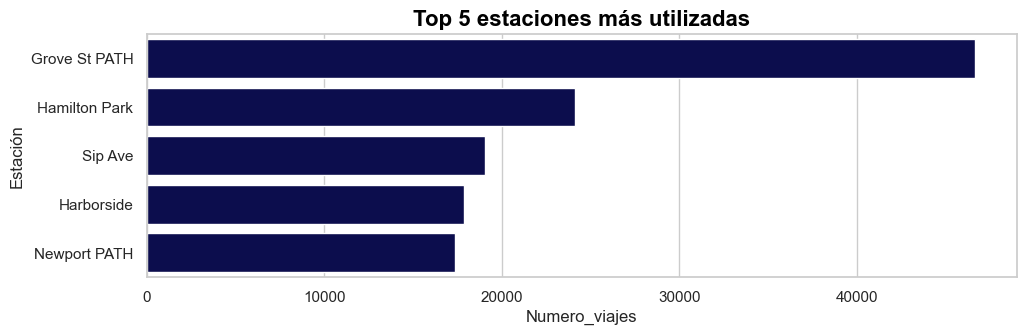

In [4]:
df_csv['tripnumber'] = df_csv.index
salida = pd.DataFrame(df_csv,columns=['tripnumber','start station name'])
salida = salida.groupby("start station name")["tripnumber"].count()
salida= salida.to_frame()
salida= salida.sort_values(by = ['tripnumber'], ascending=False).head(5)  
salida = salida.rename({'tripnumber': 'Numero_viajes'}, axis=1)
salida.reset_index(inplace=True)
salida = salida.rename({'start station name': 'Estación'}, axis=1)
salida

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(y=salida.Estación, x=salida.Numero_viajes, color= '#010358')
#ax.bar_label(ax.containers[0])

plt.title('Top 5 estaciones más utilizadas', fontsize=16, fontweight="bold", color='black')
plt.show()

La estación más utilizada es **Grove St PATH**.

##**Top 10 recorridos/trayectos realizados**

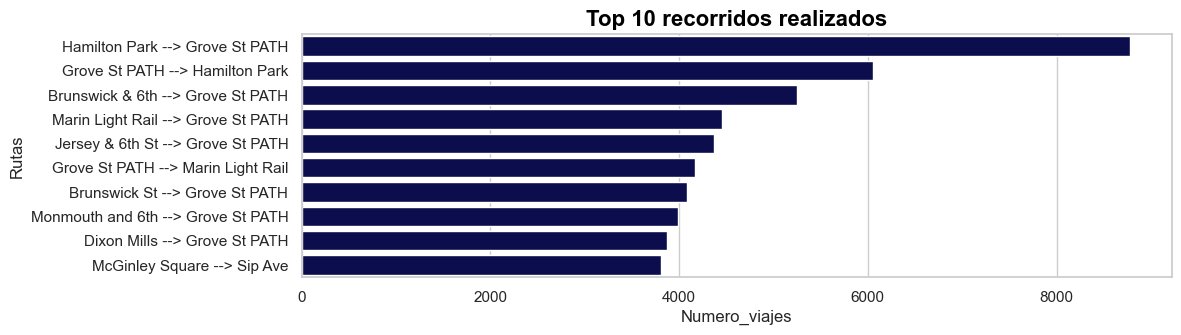

In [5]:
n_by_start_station_id = pd.DataFrame(df_csv,columns=['tripnumber','start station name', 'end station name'])
n_by_start_station_id = n_by_start_station_id.groupby(["start station name", "end station name"])["tripnumber"].count()
n_by_start_station_id = n_by_start_station_id.to_frame()
n_by_start_station_id = n_by_start_station_id.sort_values(by = ['tripnumber'], ascending=False).head(10)
n_by_start_station_id = n_by_start_station_id.rename({'tripnumber': 'Numero_viajes'}, axis=1)
n_by_start_station_id.reset_index(inplace=True)
n_by_start_station_id["Rutas"] = n_by_start_station_id["start station name"].astype(str)+ ' --> ' + n_by_start_station_id["end station name"]
n_by_start_station_id.drop(columns=['start station name', 'end station name'])

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(y=n_by_start_station_id.Rutas,x=n_by_start_station_id.Numero_viajes, orient = 'h', color= '#010358')
#ax.bar_label(ax.containers[0])

plt.title('Top 10 recorridos realizados', fontsize=16, fontweight="bold", color='black')
plt.show()

En el gráfico anterior se puede observar que en el **90%** de los recorridos más realizados tienen como origen o destino la estación **Grove St PATH**.

# A partir de los insight obtenidos en los gráficos anteriores, comenzaremos a trabajar solamente con los datos de la estación **Grove St PATH.** 

In [6]:
df_grove = df_csv[(df_csv['start station name'] == 'Grove St PATH')]
df_grove

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripnumber
1686,254,2019-01-01 01:37:17.2410,2019-01-01 01:41:31.4040,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29521,Subscriber,1984,1,1686
1687,413,2019-01-01 02:28:20.5500,2019-01-01 02:35:14.5400,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,29551,Subscriber,1984,2,1687
1688,306,2019-01-01 02:33:11.6000,2019-01-01 02:38:18.2540,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,29245,Subscriber,1989,1,1688
1689,263,2019-01-01 03:08:06.0790,2019-01-01 03:12:29.8340,3186,Grove St PATH,40.719586,-74.043117,3638,Washington St,40.724294,-74.035483,29515,Subscriber,1990,1,1689
1690,165,2019-01-01 04:08:02.0470,2019-01-01 04:10:47.6500,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,29220,Subscriber,1952,1,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404698,74,2019-12-31 19:39:08.7960,2019-12-31 19:40:23.7620,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717732,-74.043845,26286,Subscriber,1988,1,404698
404727,364,2019-12-31 21:17:08.8910,2019-12-31 21:23:13.1420,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26308,Subscriber,1978,1,404727
404740,287,2019-12-31 22:34:34.4360,2019-12-31 22:39:22.2880,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29263,Subscriber,1979,1,404740
404741,279,2019-12-31 22:40:16.6780,2019-12-31 22:44:56.1790,3186,Grove St PATH,40.719586,-74.043117,3638,Washington St,40.724294,-74.035483,29600,Subscriber,1987,1,404741


##**Distribución de viajes por día**


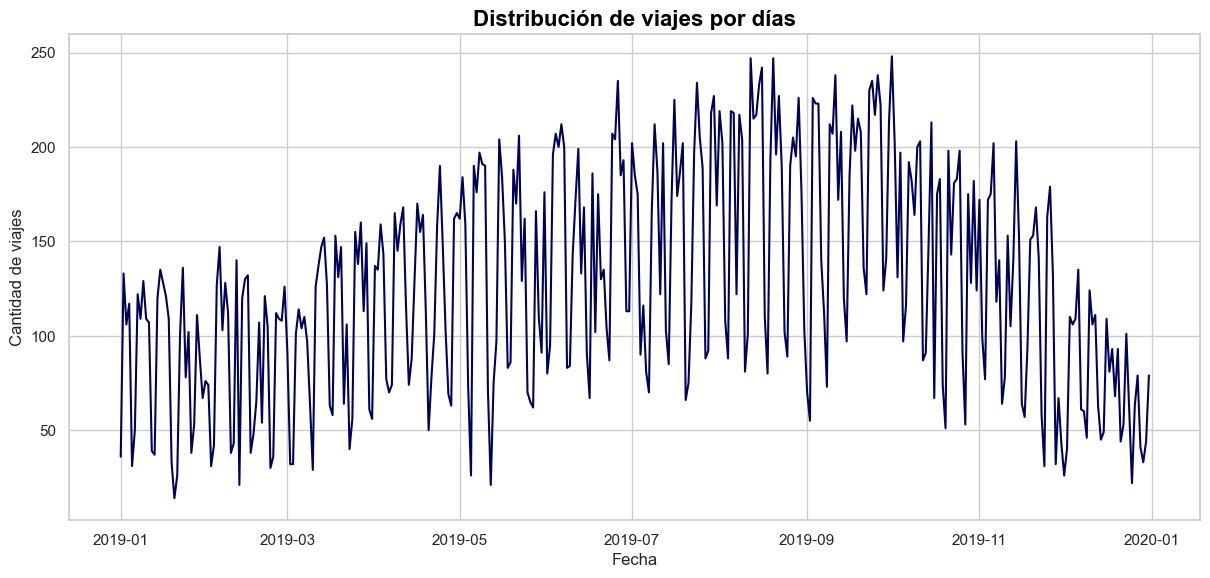

In [7]:
warnings.filterwarnings("ignore")
df_grove["starttime"] = pd.to_datetime(df_grove["starttime"])
df_grove["date"]=df_grove["starttime"].dt.date
df_grove.head(15)
df_count=df_grove.groupby("date").agg({'date':'count'}).rename(columns = {'date':'count'}).reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize = (13,6))
ax=sns.lineplot(x = "date", y = "count",data = df_count, color= '#010358')
ax.set(xlabel="Fecha", ylabel="Cantidad de viajes")
plt.title("Distribución de viajes por días", fontsize=16, fontweight="bold", color='black')
plt.show()


In [8]:
warnings.filterwarnings("ignore")
df_grove["month"]=df_grove["starttime"].dt.month
df_count_M=df_grove.groupby("month").agg({'month':'count'}).rename(columns = {'month':'Count'}).reset_index()
df_count_M["Mes"]=["Enero", "Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre",
                   "Octubre","Noviembre","Diciembre"]
df_count_M.sort_values(by="Count", ascending=False)

,month,Count,Mes
7,8,5463,Agosto
8,9,5282,Septiembre
6,7,4833,Julio
9,10,4678,Octubre
5,6,4499,Junio
4,5,4114,Mayo
3,4,3727,Abril
10,11,3585,Noviembre
2,3,3113,Marzo
0,1,2661,Enero


En los meses de verano (**julio-octubre**) es donde se visualiza la mayor cantidad de viajes, alrededor del **45%** del total anual.

##**Distribución de viajes por días de la semana**

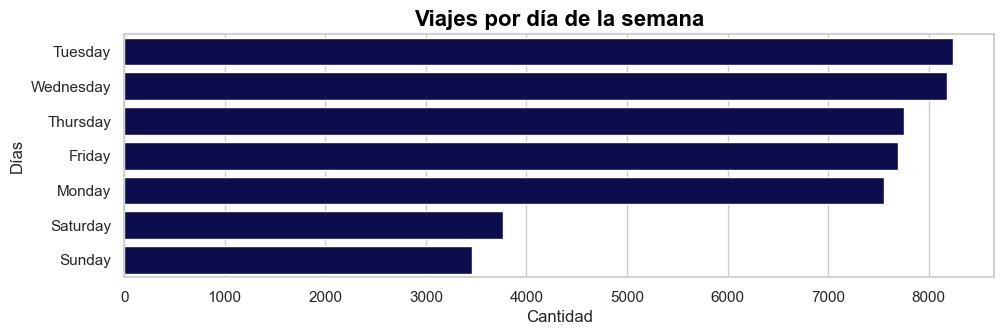

In [9]:
warnings.filterwarnings("ignore")
df_dia= df_grove
df_dia["day"]=df_grove["starttime"].dt.day_name()
df_dia=df_dia.groupby("day").agg({'day':'count'}).rename(columns = {'day':'Count'}).reset_index()
df_dia=df_dia.sort_values(by="Count", ascending=False)

f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(y=df_dia.day, x=df_dia.Count, color= '#010358')
sns.set_theme(style="whitegrid")
plt.title('Viajes por día de la semana', fontsize=16, fontweight="bold", color='black')
plt.xlabel("Cantidad")
plt.ylabel("Días")
plt.show()

Como se puede visualizar en el gráfico la mayor cantidad de rentas son **durante los días de semana**, siendo los sábados y domingos las fechas con menor cantidad.

##**Análisis de viajes por hora**

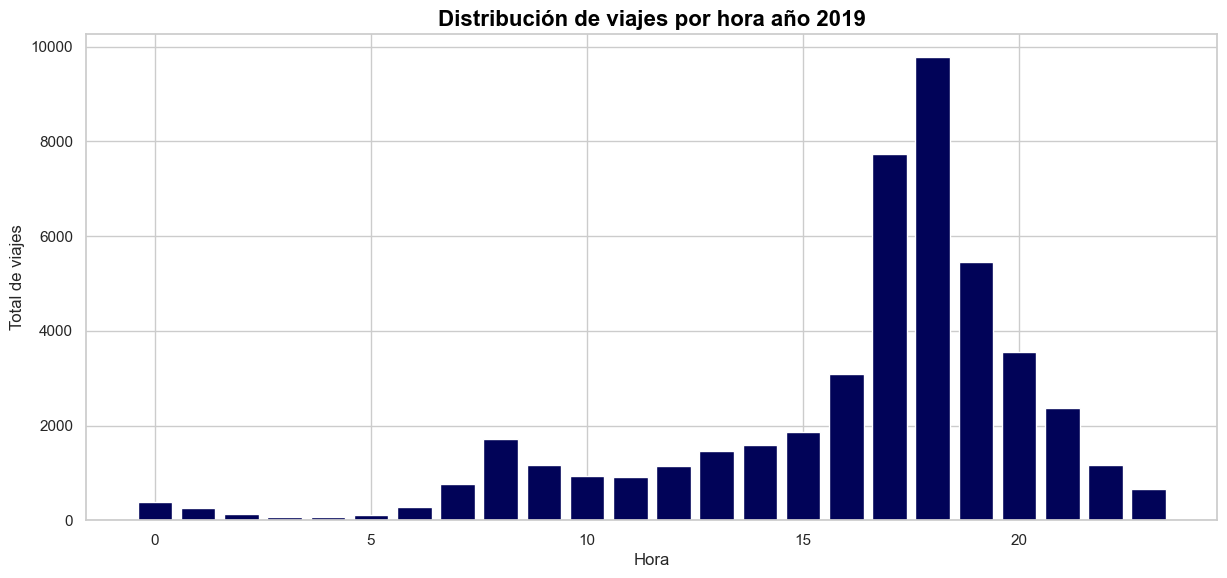

In [10]:
warnings.filterwarnings("ignore")
df_grove['hour'] = df_grove['starttime'].dt.hour
hs=df_grove.groupby('hour').size()
hs.index
hs.values
sns.set_theme(style="whitegrid")
plt.figure(figsize = (13,6))
plt.bar(hs.index,hs.values, color= '#010358')
plt.title('Distribución de viajes por hora año 2019', fontsize=16, fontweight="bold", color='black')
plt.xlabel('Hora')
plt.ylabel('Total de viajes')
plt.show()

Los horarios de mayor demanda son: **entre las 17 - 19 hs**. 
Esto indica que el servicio es muy usado para retornar a sus casas desde el lugar de trabajo o estudio.
Concordando con el gráfico por días de la semana donde hay mayor cantidad de alquileres.


##**Distribución de usuarios por género**

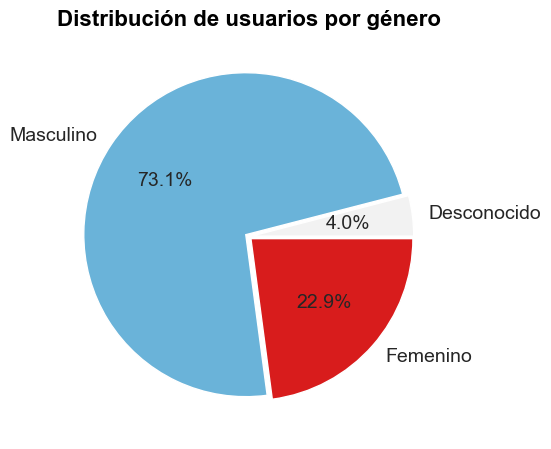

In [11]:
prom_MF=df_grove.gender.value_counts()/df_grove["gender"].count()*100
values = [prom_MF[0],prom_MF[1],prom_MF[2]]
labels=["Desconocido", "Masculino", "Femenino"]
colors= ["#F2F2F2","#6AB3D9", "#D81C1C"]
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(values, labels=labels, textprops={"fontsize":14}, colors=colors, autopct='%1.1f%%', explode=(0.02, 0.02, 0.02))
plt.title("Distribución de usuarios por género", fontsize=16, fontweight="bold", color='black')
plt.show()

El **73%** de los usuarios del servicio de bicicletas son **hombres**. 

##**Distribución de usuarios por tipo de suscripción**

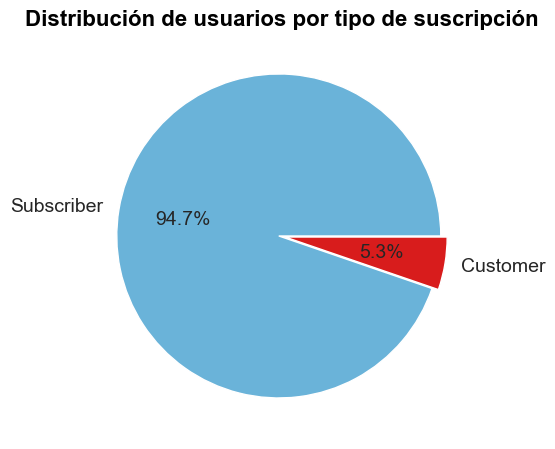

In [12]:
prom_MF=df_grove.usertype.value_counts()/df_grove["usertype"].count()*100
users = [prom_MF["Subscriber"],prom_MF["Customer"]]
labels=["Subscriber", "Customer"]
colors= ["#6AB3D9", "#D81C1C"]
fig2, ax2 = plt.subplots(figsize=(8, 5))
ax2.pie(users, labels=labels, textprops={"fontsize":14}, colors=colors, autopct='%1.1f%%', explode=(0.02, 0.02))
plt.title("Distribución de usuarios por tipo de suscripción", fontsize=16, fontweight="bold", color='black')
plt.show()

Alrededor del **95% de los usuarios es Subscriber**, es decir pagan una membresía mensual. 

##**Distribución etaria de los usuarios del sistema**

In [13]:
df_grove['age']=2019-df_grove['birth year']

Text(0.5, 0, 'Grupos etarios')

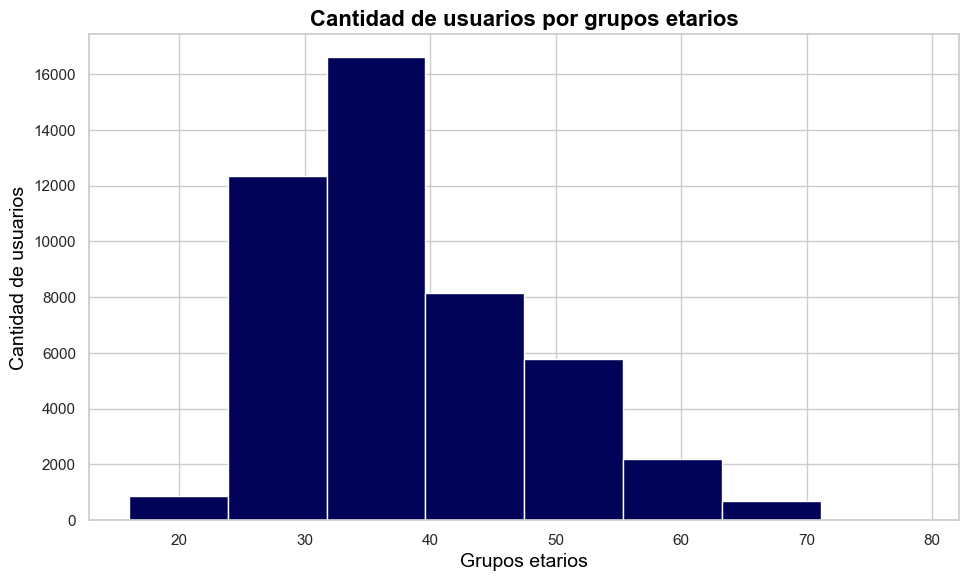

In [14]:
usuarios_edades_grove = df_grove['age']
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax.hist(usuarios_edades_grove.values.flatten(), bins=8, color= '#010358')
ax.set_title('Cantidad de usuarios por grupos etarios', fontsize=16, fontweight="bold", color='black')
ax.set_ylabel('Cantidad de usuarios', fontsize=14, color='black')
ax.set_xlabel('Grupos etarios', fontsize=14, color='black')

*   La mayoría de los usuarios tienen **35 años**
*   El **90%** de los usuarios tienen menos de 51 años.
*   El **50%** de los usuarios tienen entre 30 y 44 años. 

Como observamos aquí por el grupo etario y comparando con los días de la semana más usados (lunes a viernes), queda claro que dicha estación es altamente usada por gente en edad laboral, la cual utiliza el servicio de bicicletas para regresar a su lugar de residencia.

##**4. ENTRENAMIENTO Y TESTEO** 
Entrenamiento y testeo de al menos 2 modelos distintos de Machine Learning utilizando algún método de validación cruzada.

Aquí se prodece a manipular los datos para obtener un dataframe el cuál contenga agrupado por día la cantidad de viajes que se iniciaron desde Grove St PATH, la cuál es la estación que queremos analizar para poder realizar una predicción mediante series de tiempo.

Aquí se procede a manipular los datos para obtener un DF el cual contenga agrupado por día la cantidad de viajes que se iniciaron desde Grove St PATH, la cual es la estación que queremos analizar para poder realizar una predicción mediante series de tiempo.

Acotamos el dataframe para que solo contenga viajes desde el mes de enero hasta el mes de septiembre ya que es este el cual intentaremos predecir usando una serie de tiempo.

In [15]:
bicis = df_grove
bicis["starttime"] = pd.to_datetime(bicis["starttime"])
bicis["stoptime"] = pd.to_datetime(bicis["stoptime"])
bicis=bicis[(bicis['starttime'] <'2019-10-01')]
bicis['date'] = bicis['starttime'].dt.date
bicis=bicis.groupby('date').agg({'starttime':'count'}).rename(columns ={'starttime': 'viajes'}).reset_index()
bicis

,date,viajes
0,2019-01-01,36
1,2019-01-02,133
2,2019-01-03,106
3,2019-01-04,117
4,2019-01-05,31
...,...,...
268,2019-09-26,238
269,2019-09-27,222
270,2019-09-28,124
271,2019-09-29,141


In [16]:
databicis = bicis

Realizamos una copia del data frame para ser manipulado y realizar la predicción.

In [17]:
databicis = databicis.set_index('date')
databicis = databicis.rename(columns={'viajes': 'y'})
databicis = databicis.asfreq('d')
databicis = databicis.sort_index()
databicis.dtypes

y    int64
dtype: object

In [18]:
(databicis.index == pd.date_range(start=databicis.index.min(),
                             end=databicis.index.max(),
                             freq=databicis.index.freq)).all()

True

Comprobamos que no tenemos falta de datos en ningun dia en nuestro periodo.

Train dates : 2019-01-01 00:00:00 --- 2019-08-31 00:00:00  (n=243)
Test dates  : 2019-09-01 00:00:00 --- 2019-09-30 00:00:00  (n=30)


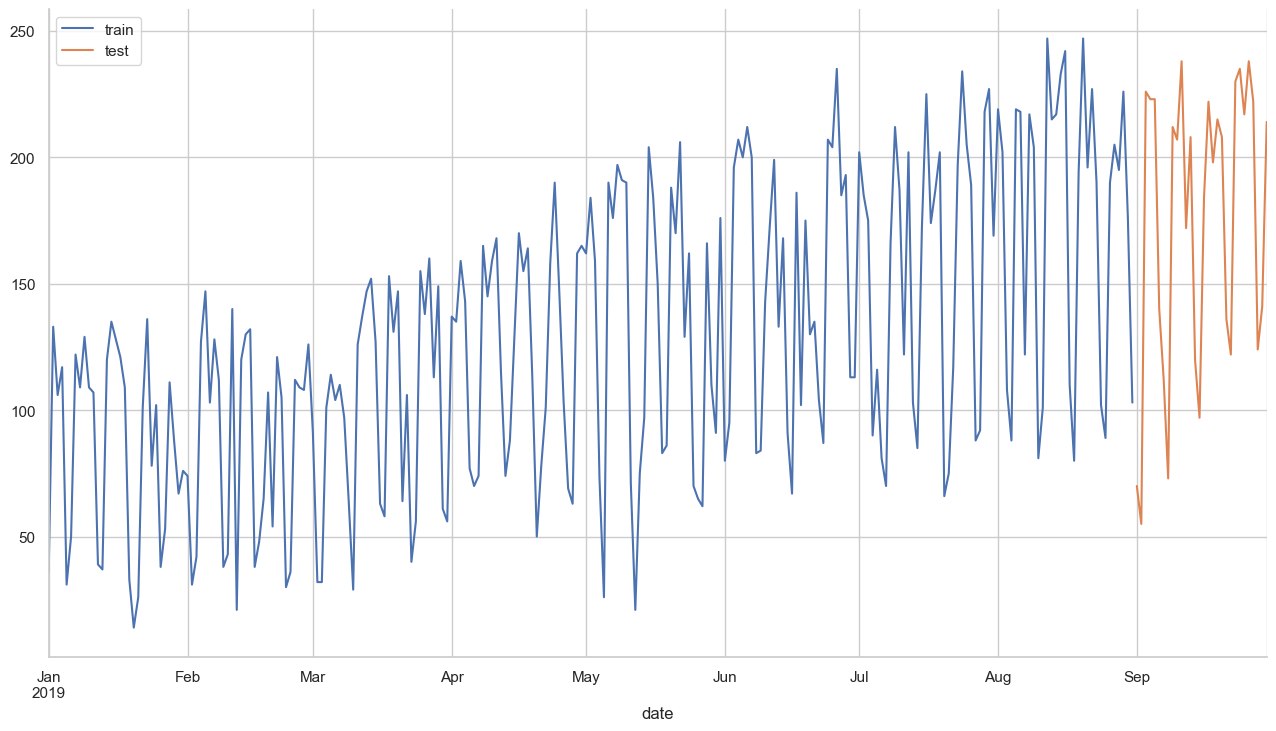

In [19]:
steps = 30
databicis_train = databicis[:-steps]
databicis_test  = databicis[-steps:]

sns.set_theme(style="whitegrid", rc= {"axes.spines.right": False, "axes.spines.top": False})

print(f"Train dates : {databicis_train.index.min()} --- {databicis_train.index.max()}  (n={len(databicis_train)})")
print(f"Test dates  : {databicis_test.index.min()} --- {databicis_test.index.max()}  (n={len(databicis_test)})")

fig, ax=plt.subplots(figsize=(14, 8))
databicis_train['y'].plot(ax=ax, label='train')
databicis_test['y'].plot(ax=ax, label='test')
ax.legend();

Dividimos el dataset en 2 siendo desde enero a agosto la parte usada para el entrenamiento y el mes de septiembre la parte que usaremos para testear los resultados obtenidos comparandolos con esta que seria su contraparte real.

Como para asi demarcar que en este caso vamos a realizar una prediccion sobre el mes de septiembre lo graficamos en rojo.

##**IMPLEMENTACIÓN DEL LINEAR REGRESSOR PARA SERIES DE TIEMPO**

Procedemos a implementar el modelo, para ello decidimos asignar a steps el valor 30 ya que con la cantidad de dias del mes septiembre, que a su vez es el ultimo mes del dataset.

Aplicamos como regressor en modelo Forecaster una regresion lineal, y aplicamos un intervalo superior e inferior respecto al valor a predecir.

In [20]:
steps = 30
datos_train = databicis[:-steps]
datos_test  = databicis[-steps:]

In [21]:
inicio_linear = time.time()

In [22]:
forecaster_linear = ForecasterAutoreg(
                    regressor = LinearRegression(),
                    lags = 15
             )

forecaster_linear.fit(y=datos_train['y'])

In [23]:
predicciones_linear = forecaster_linear.predict_interval(
                    steps    = steps,
                    interval = [10, 90],
                    n_boot   = 500
               )

predicciones_linear.head(5)

,pred,lower_bound,upper_bound
2019-09-01,97.290421,53.630497,131.118063
2019-09-02,186.075883,138.190255,223.464990
2019-09-03,215.176386,171.332066,254.964400
2019-09-04,204.284970,164.646162,246.516434
2019-09-05,224.040514,183.317187,264.759063


Obtenemos un dataframe con los dias del mes de septiembre como indice, y tres columnas.

La primera indica un valor tentativo de nuestra predicción. La segunda y tercera representan los valores mínimo y maximo de nuestro intervalor de confianza.

In [24]:
fin_linear = time.time()
tiempo_ejecucion_linear = fin_linear - inicio_linear
print("El tiempo que tardo en ejecutarse el modelo usando regresion lineal fue: ", tiempo_ejecucion_linear)

El tiempo que tardo en ejecutarse el modelo usando regresion lineal fue:  1.5155208110809326


##**IMPLEMENTACIÓN DE RANDOM FOREST REGRESSOR PARA SERIES DE TIEMPO**

Aplicamos como regressor en modelo Forecaster un ramdom forest regressor, y aplicamos un intervalo superior e inferior respecto al valor a predecir.

In [25]:
inicio_random = time.time()

In [26]:
forecaster_random = ForecasterAutoreg(
                regressor = RandomForestRegressor(),
                lags      = 15
             )

forecaster_random.fit(y=datos_train['y'])

In [27]:
predicciones_random = forecaster_random.predict_interval(
                    steps    = steps,
                    interval = [10, 90],
                    n_boot   = 500
               )

predicciones_random.head(5)

,pred,lower_bound,upper_bound
2019-09-01,88.26,72.330,102.270
2019-09-02,197.40,179.392,211.229
2019-09-03,206.29,177.272,219.563
2019-09-04,199.61,184.883,215.754
2019-09-05,212.63,196.907,225.137


Obtenemos un dataframe con los dias del mes de septiembre como indice, y tres columnas.

La primera indica un valor tentativo de nuestra predicción. La segunda y tercera representan los valores mínimo y mximo de nuestro intervalor de confianza.

In [28]:
fin_random = time.time()
tiempo_ejecucion_random = fin_random - inicio_random
print("El tiempo que tardo en ejecutarse el modelo usando random forest fue: ", tiempo_ejecucion_random)

El tiempo que tardo en ejecutarse el modelo usando random forest fue:  94.09268617630005


### **7.OPTIMIZACIÓN**


UTILIZACION DE GRIDSEARCH PARA BUSQUEDA DE HIPERPARAMETROS PARA LINEAR REGRESSOR


Ahora utilizaremos grid search para allar entre diferentes convinaciones de hiperparametros cual es la que nos da mejores resultados para ello se utilizara la metrica mean squared error como comparador.

In [29]:
inicio_linear_ajuste = time.time()

In [30]:
forecaster_linear_ajuste = ForecasterAutoreg(
                regressor = LinearRegression(),
                lags      = 12 
             )

lags_grid_linear_ajuste = [5,10,15,20]

param_grid_linear_ajuste = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, None],
    'positive': [True,False]
}

resultados_grid_linear_ajuste = grid_search_forecaster(
                        forecaster         = forecaster_linear_ajuste,
                        y                  = datos_train['y'],
                        param_grid         = param_grid_linear_ajuste,
                        lags_grid          = lags_grid_linear_ajuste,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                  )
resultados_grid_linear_ajuste

Number of models compared: 64.


loop lags_grid: 100%|███████████████████████████████████████| 4/4 [00:01<00:00,  2.08it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'copy_X': False, 'fit_intercept': False, 'n_jobs': None, 'positive': False}
  Backtesting metric: 1655.034115998275



,lags,params,mean_squared_error,copy_X,fit_intercept,n_jobs,positive
63,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'copy_X': False, 'fit_intercept': False, 'n_j...",1655.034116,False,False,NaN,False
55,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'copy_X': True, 'fit_intercept': False, 'n_jo...",1655.034116,True,False,NaN,False
53,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'copy_X': True, 'fit_intercept': False, 'n_jo...",1655.034116,True,False,-1.0,False
61,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'copy_X': False, 'fit_intercept': False, 'n_j...",1655.034116,False,False,-1.0,False
37,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'copy_X': True, 'fit_intercept': False, 'n_jo...",1685.993730,True,False,-1.0,False
...,...,...,...,...,...,...,...
0,"[1, 2, 3, 4, 5]","{'copy_X': True, 'fit_intercept': True, 'n_job...",4599.231995,True,True,-1.0,True
11,"[1, 2, 3, 4, 5]","{'copy_X': False, 'fit_intercept': True, 'n_jo...",4786.301912,False,True,NaN,False
9,"[1, 2, 3, 4, 5]","{'copy_X': False, 'fit_intercept': True, 'n_jo...",4786.301912,False,True,-1.0,False
3,"[1, 2, 3, 4, 5]","{'copy_X': True, 'fit_intercept': True, 'n_job...",4786.301912,True,True,NaN,False


Procedemos a entrerar nuestro modelo seleccionando la convinacion de hiperparametros que nos arrojo nuestro grid search forecaster y con ellos correremos el modelo.

In [31]:
fin_linear_ajuste = time.time()
tiempo_ejecucion_linear_ajuste = fin_linear_ajuste - inicio_linear_ajuste
print("El tiempo que tardo en buscar el mejor ajuste de hiperparametros usando linear regressor fue: ", tiempo_ejecucion_linear_ajuste)

El tiempo que tardo en buscar el mejor ajuste de hiperparametros usando linear regressor fue:  1.9930438995361328


In [32]:
inicio_linear_tune = time.time()

In [33]:
regressor_linear_ajuste = LinearRegression(fit_intercept = False, copy_X = False,n_jobs = None, positive = False)
forecaster_linear_ajuste = ForecasterAutoreg(
                regressor = regressor_linear_ajuste,
                lags = 20
             )

forecaster_linear_ajuste.fit(y=datos_train['y'])

In [34]:
predicciones_linear_ajuste = forecaster_linear_ajuste.predict_interval(
                    steps    = steps,
                    interval = [10, 90],
                    n_boot   = 500
               )

predicciones_linear_ajuste.head(5)


,pred,lower_bound,upper_bound
2019-09-01,114.519859,77.186569,152.433188
2019-09-02,197.270362,153.886242,235.992558
2019-09-03,229.587928,184.919626,270.174635
2019-09-04,215.839931,173.181401,254.966473
2019-09-05,238.878815,196.055072,278.357480


Utilizaremos diferentes medidas para evaluar nuestro modelo y conocer mas sobre su efectividad como asi tambien poder llegar a compararlo con otros modelos. Ademas de medir los tiempos de ejecución y entrenamiento mas el tiempo de busqueda de grid search.

In [35]:
fin_linear_tune = time.time()
tiempo_ejecucion_linear_tune= fin_linear_tune - inicio_linear_tune
print("El tiempo que tardo en ejecutarse el modelo usando linear regressor con hiperparametros ajustados fue: ", tiempo_ejecucion_linear_tune)

El tiempo que tardo en ejecutarse el modelo usando linear regressor con hiperparametros ajustados fue:  1.347033977508545


In [36]:
MSE_linear_ajuste = metrics.mean_squared_error(datos_test['y'], predicciones_linear_ajuste['pred'])
r2_linear_ajuste = r2_score(datos_test['y'], predicciones_linear_ajuste['pred'])
rdr_linear_ajuste = RdR_scorer()
rdr_linear_ajuste.fit(ts = datos_train, 
         y_colname = 'y', 
         n_step = len(datos_test), 
         y_true = datos_test, 
         y_pred = predicciones_linear_ajuste['pred'], 
         model_name = 'LINEAR CON AJUSTE',
         freq = 12)
RDR_linear_ajuste = rdr_linear_ajuste.score()

In [37]:
print('MSE - Mean Squared Error:',MSE_linear_ajuste) # MSE
print('El r^2 es:',r2_linear_ajuste) #R2
print('El valor rdr es: ', RDR_linear_ajuste) #RDR

MSE - Mean Squared Error: 1243.0084641237445
El r^2 es: 0.6051846843223461
El valor rdr es:  0.6820265033527184


UTILIZACION DE GRIDSEARCH PARA BUSQUEDA DE HIPERPARAMETROS PARA RANDOM FOREST REGRESSOR

In [38]:
inicio_random_ajuste = time.time()

In [39]:
forecaster_random_ajuste = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 
             )


lags_grid_random_ajuste = [5,10,15,20]


param_grid_random_ajuste = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

resultados_grid_random_ajuste = grid_search_forecaster(
                        forecaster         = forecaster_random_ajuste,
                        y                  = datos_train['y'],
                        param_grid         = param_grid_random_ajuste,
                        lags_grid          = lags_grid_random_ajuste,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                  )
resultados_grid_random_ajuste

Number of models compared: 24.


loop lags_grid: 100%|███████████████████████████████████████| 4/4 [01:52<00:00, 28.12s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 10, 'n_estimators': 500}
  Backtesting metric: 2002.1471499941706



,lags,params,mean_squared_error,max_depth,n_estimators
23,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",2002.147150,10,500
14,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",2043.120858,5,100
21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",2072.267821,5,500
16,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",2115.438138,10,100
22,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",2124.453291,10,100
19,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",2126.237826,3,500
15,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",2129.549682,5,500
17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",2151.629677,10,500
18,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",2160.463524,3,100
20,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",2161.371837,5,100


In [40]:
fin_random_ajuste = time.time()
tiempo_ejecucion_random_ajuste = fin_random_ajuste - inicio_random_ajuste
print("El tiempo que tardo en buscar el mejor ajuste de hiperparametros usando random forest fue: ", tiempo_ejecucion_random_ajuste)

El tiempo que tardo en buscar el mejor ajuste de hiperparametros usando random forest fue:  114.13482284545898


In [41]:
inicio_random_tune = time.time()

In [42]:
regressor_random_ajuste = RandomForestRegressor(max_depth=10, n_estimators=500, random_state=123)
forecaster_random_ajuste = ForecasterAutoreg(
                regressor = regressor_random_ajuste,
                lags      = 20
             )

forecaster_random_ajuste.fit(y=datos_train['y'])

In [43]:
predicciones_random_ajuste = forecaster_random_ajuste.predict_interval(
                    steps    = steps,
                    interval = [10, 90],
                    n_boot   = 500
               )

In [44]:
fin_random_tune = time.time()
tiempo_ejecucion_random_tune = fin_random_tune - inicio_random_tune
print("El tiempo que tardo en ejecutarse el modelo usando random forest con hiperparametros ajustados fue: ", tiempo_ejecucion_random_tune)

El tiempo que tardo en ejecutarse el modelo usando random forest con hiperparametros ajustados fue:  453.477477312088


Utilizaremos diferentes medidas para evaluar nuestro modelo y conocer mas sobre su efectividad como asi tambien poder llegar a compararlo con otros modelos. Ademas de medir los tiempos de ejecución y entrenamiento mas el tiempo de busqueda de grid search.

In [45]:
MSE_random_tune = metrics.mean_squared_error(datos_test['y'], predicciones_random_ajuste['pred'])
r2_random_tune = r2_score(datos_test['y'], predicciones_random_ajuste['pred'])
rdr_random_tune = RdR_scorer()
rdr_random_tune.fit(ts = datos_train, 
         y_colname = 'y', 
         n_step = len(datos_test), 
         y_true = datos_test, 
         y_pred = predicciones_random_ajuste['pred'], 
         model_name = 'RANDOM FOREST CON AJUSTE',
         freq = 12)
RDR_random_tune = rdr_random_tune.score()

In [46]:
print('MSE - Mean Squared Error:',MSE_random_tune) # MSE
print('El r^2 es:',r2_random_tune) #R2
print('El valor rdr es: ', RDR_random_tune) #RDR

MSE - Mean Squared Error: 1141.0801647894446
El r^2 es: 0.637560050089889
El valor rdr es:  0.7085172618302273



### **8. SELECCIÓN DE MODELO FINAL**


Si comparamos los modelos de la sección anteior podemos sacar las siguientes conclusiones:
El modelo de forecast que utiliza como regressor un random forest en el mejor de los casos propuestos (el que daba mejores metricas para unos hiperparametros en especifico) tiene un leves mejoras en los valores de error cuadradico medio, r cuadrado y RdR frente al modelo que utiliza como regressor un linear regressor.
Aunque esta ligera mejoria la cual es despreciable en fines practicos es a costa de un gran costo computacional ya que tanto en la etapa de grid search para la obtención de la mejor combinación de hiperparametros como en la etapa de entrenamiento y ejecución del modelo el modelo que usaba linear regresor era casi instantaneo mientras que el que usa random forest necesitaba una cantidad desproporcionadamente mayor para la leve mejoria obtenida.

A continuación se graficaran y mostraran los resultados obtenidos para nuestro modelo para tener una mejor comprensión de la cantidad de bicicletas que se alquilaran teoricamente en nuestra estacion grove st path y cual es el nivel de exactitud en esto cuando lo comparamos con los datos de test.

Si analizamos los resultados veremos que un 87% de los dias el valor real estuvo en el intervalo de prección.

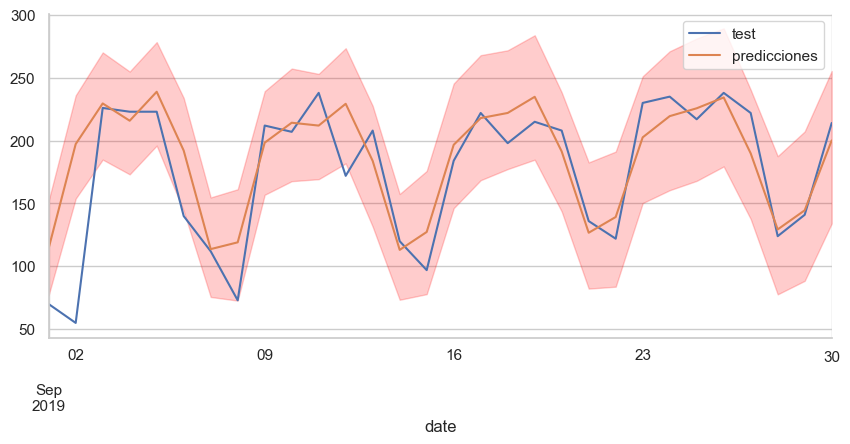

In [47]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_test['y'].plot(ax=ax, label='test')
predicciones_linear_ajuste['pred'].plot(ax=ax, label='predicciones')
sns.set_theme(style="whitegrid", rc= {"axes.spines.right": False, "axes.spines.top": False})

ax.fill_between(
    predicciones_linear_ajuste.index,
    predicciones_linear_ajuste['lower_bound'],
    predicciones_linear_ajuste['upper_bound'],
    color = 'red',
    alpha = 0.2
)
ax.legend();

In [48]:
dentro_intervalo_linear_ajuste = np.where(
                     (databicis.loc[predicciones_linear_ajuste.index, 'y'] >= predicciones_linear_ajuste['lower_bound']) & \
                     (databicis.loc[predicciones_linear_ajuste.index, 'y'] <= predicciones_linear_ajuste['upper_bound']),
                     True,
                     False
                   )

cobertura_linear_ajuste = dentro_intervalo_linear_ajuste.mean()
print(f"Cobertura del intervalo predicho: {round(100*cobertura_linear_ajuste, 2)} %")

Cobertura del intervalo predicho: 86.67 %


Utilizaremos diferentes medidas para evaluar nuestro modelo y conocer mas sobre su efectividad. Ademas de que podremos obtener insights relevantes que serviran para tomar decisiones a posteor.

In [62]:
tabla_dia = predicciones_linear_ajuste
tabla_dia.rename(columns = {'pred':'prediccion','lower_bound':'valor minimo','upper_bound':'valor maximo'}, inplace = True)
tabla_dia = tabla_dia.round()
tabla_dia

,prediccion,valor minimo,valor maximo
2019-09-01,115.0,77.0,152.0
2019-09-02,197.0,154.0,236.0
2019-09-03,230.0,185.0,270.0
2019-09-04,216.0,173.0,255.0
2019-09-05,239.0,196.0,278.0
2019-09-06,192.0,144.0,234.0
2019-09-07,114.0,76.0,155.0
2019-09-08,119.0,73.0,161.0
2019-09-09,198.0,157.0,239.0
2019-09-10,214.0,168.0,257.0


In [ ]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

ax.table(cellText=df.values, colLabels=df.columns, loc='center')

fig.tight_layout()

plt.show()

In [57]:
prediccion_promedio_viajes = np.mean(predicciones_linear_ajuste['prediccion'])
print('El promedio de la cantidad de viajes en septiembre en la estacion grove st path sera: ', prediccion_promedio_viajes)

El promedio de la cantidad de viajes en septiembre en la estacion grove st path sera:  185.8069654595803


In [58]:
real_promedio_viajes = np.mean(datos_test['y'])
print('El promedio  real de la cantidad de viajes en septiembre en la estacion grove st path fue: ', real_promedio_viajes)

El promedio  real de la cantidad de viajes en septiembre en la estacion grove st path fue:  176.06666666666666


In [53]:
print('MAE - Mean Absolute Error:', metrics.mean_absolute_error(datos_test['y'], predicciones_linear_ajuste['prediccion'])) # MAE
print('MAPE - Mean Absolute Percentage Error:', np.mean(np.abs((datos_test['y'] - predicciones_linear_ajuste['prediccion']) / datos_test['y']))*100)
print('MSE - Mean Squared Error:', metrics.mean_squared_error(datos_test['y'], predicciones_linear_ajuste['prediccion'])) # MSE
print('RMSE - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(datos_test['y'], predicciones_linear_ajuste['prediccion']))) # RMSE
print('MedAE - Median Absolute Error:',metrics.median_absolute_error(datos_test['y'], predicciones_linear_ajuste['prediccion']))

MAE - Mean Absolute Error: 23.09730807193955
MAPE - Mean Absolute Percentage Error: 21.661397573631607
MSE - Mean Squared Error: 1243.0084641237445
RMSE - Root Mean Squared Error: 35.25632516476646
MedAE - Median Absolute Error: 15.699216158797682


Si realizamos un analisis de cada una de las metricas detalladas podemos decir que:


*   Un error medio absoluto (MAE) nos indica que nuestros valores predichos difieren en promedio un 23.1 pasajeros respecto al valor real lo cual es un valor aceptable teniendo en cuenta el promedio de viajes por dia real fue de 185.81.
*   El error absoluto porcentual nos da una impresion de que porcentaje de error tuvimos respecto al valor real.
*   El error cuadratico medio (MSE) mide el error cuadrado promedio de nuestras predicciones, cuanto peor es nuestra prediccion mayor sera este valor.
*   La Raíz de la Desviación Cuadrática Media (RMSE) es un valor el cual cuanto menor es más cercanos son los valores predichos y observados.
*   Incluimos tambian el error mediano absoluto (MedAE) el cual es otro punto de vista parecido al MAE pero usando la mediana en vez de la media, si bien son parecidos al usar la mediana lo hace menos susceptible a que valores outliers.


Aqui utilizamos r cuadrado como parametro de medicion siendo este un valor entre 0 y 1, cuanto mas cerca de un 1 se interpreta que la prediccion se comporta como ideal.

In [54]:
r2_linear_ajuste = r2_score(datos_test['y'], predicciones_linear_ajuste['prediccion'])
print('El r^2 es:',r2_linear_ajuste)

El r^2 es: 0.6051846843223461


Por ultimo utilizamos otra tecnica de medición y evaluacion llamada RdR el cual es un parametro que utiliza de otras medidas de evaluacion para su calculo. 

In [55]:
print('El valor rdr es: ', RDR_linear_ajuste) #RDR

El valor rdr es:  0.6820265033527184


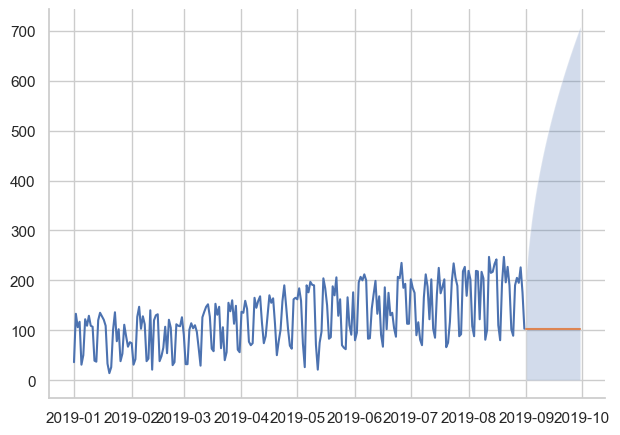

In [56]:
plt.plot(datos_train)
plt.plot(figsize=(9, 4))
plt.rc('xtick', labelsize=9)
sns.set_theme(style="whitegrid", rc= {"axes.spines.right": False, "axes.spines.top": False})
plt.plot(rdr_linear_ajuste.get_randomwalk_pred()['Y_PRED'])
plt.fill_between(rdr_linear_ajuste.get_randomwalk_pred().index, 
                 rdr_linear_ajuste.get_randomwalk_pred()['Y_PRED_UPPER'],
                 alpha = 0.25)


El intervalo sombreado en azul se interpreta como una semi campana, intervalo el cual tiene los valores posibles que tendriamos en nuestro periodo de tiempo si hicieramos un ramdom walk, por lo que nuestra prediccion debe estar en ese intervalo. Caso contrario el uso de nuestro modelo seria contraproducente ya que daria resultados peores que una serie aleatoria.

Obteniendo un valor de 0.682 o un 68.2% podemos realizar la siguiente interpretación. Nuestro modelo de prediccion es un 68.2% mejor que una serie ramdom para el intervalo a predecir.

Como conclusión podemos podemos decir que nuestro modelo cumple con las expectativas de nuestro alcance y podria aplicarse en meses siguientes para tener con los datos de entrenamiento adecuados una idea bastante acertada de cuantas personas alquilaran una bicicleta en nuestra estación de estudio.